In [23]:
import sqlite3
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
from data import SQLRepository
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Prepare data
### Import

In [24]:
# create conection to your database and instanciate SQLRepository to interact with your database
load_dotenv()
connection = sqlite3.connect(os.getenv("db_name"), check_same_thread=False)
repo = SQLRepository(connection=connection)

print("repo type:", type(repo))
print("repo.connection type:", type(repo.connection))

repo type: <class 'data.SQLRepository'>
repo.connection type: <class 'sqlite3.Connection'>


In [25]:
df_ambuja = repo.read_table(table_name="AMBUJACEM.BSE", limit=3000)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (3000, 5)


,open,high,low,close,volume
date,,,,,
2026-01-13,538.75,545.45,533.95,537.65,23288.0
2026-01-12,535.45,540.45,528.50,538.55,87880.0
2026-01-09,545.65,548.25,535.60,536.95,68041.0
2026-01-08,561.80,561.85,545.50,546.95,47801.0
2026-01-07,563.50,565.15,560.75,561.80,29575.0


In [26]:
#create a function that get table fromthe database and returns the cloumn returns as aseries
def wrangle_data(ticker, n_observations):
    """Extract table data from database. Calculate returns.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the stock (also table name in database).

    n_observations : int
        Number of observations to return.

    Returns
    -------
    pd.Series
        Name will be `"return"`. There will be no `NaN` values.
    """
    # Get table from database
    
    df = repo.read_table(table_name=ticker, limit=n_observations+1)


    # Sort DataFrame ascending by date
    df.sort_index(inplace=True)


    # Create "return" column
    df["return"] = df["close"].pct_change() * 100
    


    # Return returns
    return df["return"].dropna()

In [27]:
y_suzlon = wrangle_data(ticker="SUZLON.BSE", n_observations=2500)

print("y_suzlon type:", type(y_suzlon))
print("y_suzlon shape:", y_suzlon.shape)
y_suzlon.head()

y_suzlon type: <class 'pandas.core.series.Series'>
y_suzlon shape: (2500,)


date
2015-11-30   -0.230415
2015-12-01    4.849885
2015-12-02   -1.762115
2015-12-03   -0.224215
2015-12-04    0.224719
Name: return, dtype: float64

In [28]:
y_ambuja = wrangle_data(ticker="AMBUJACEM.BSE", n_observations=2500)

print("y_ambuja type:", type(y_ambuja))
print("y_ambuja shape:", y_ambuja.shape)
y_ambuja.head()

y_ambuja type: <class 'pandas.core.series.Series'>
y_ambuja shape: (2500,)


date
2015-11-20    1.490275
2015-11-23    0.174216
2015-11-24    0.546584
2015-11-26    0.345935
2015-11-27   -0.566363
Name: return, dtype: float64

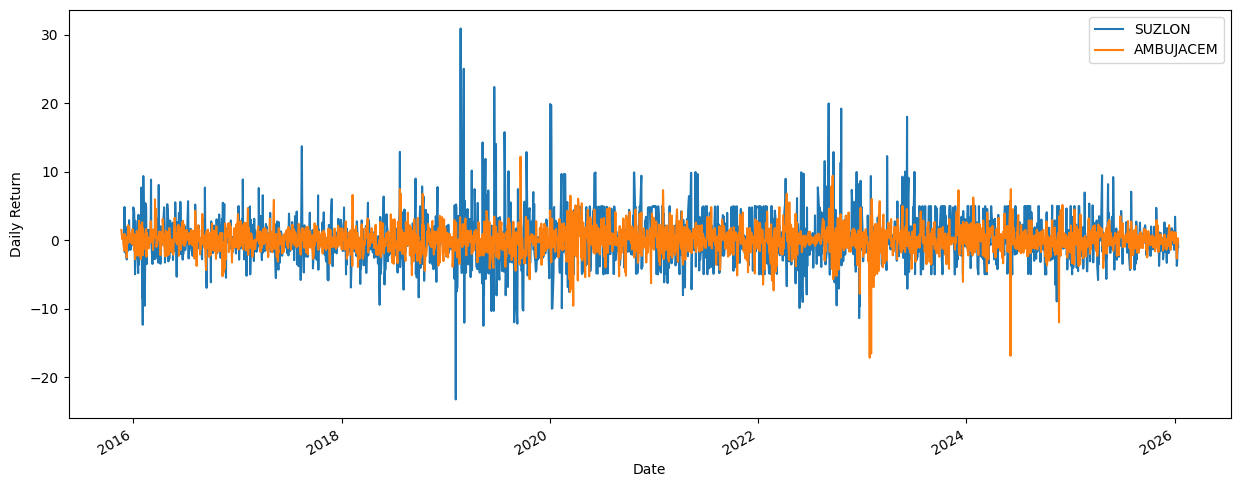

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_suzlon` and `df_ambuja`
y_suzlon.plot(ax=ax, label="SUZLON")
y_ambuja.plot(ax=ax, label="AMBUJACEM")
# Label axes
plt.xlabel("Date")
plt.ylabel("Daily Return")



# Add legend
plt.legend()
plt.show();

Text(0.5, 1.0, 'Distribution of Ambuja Cement daily Returns')

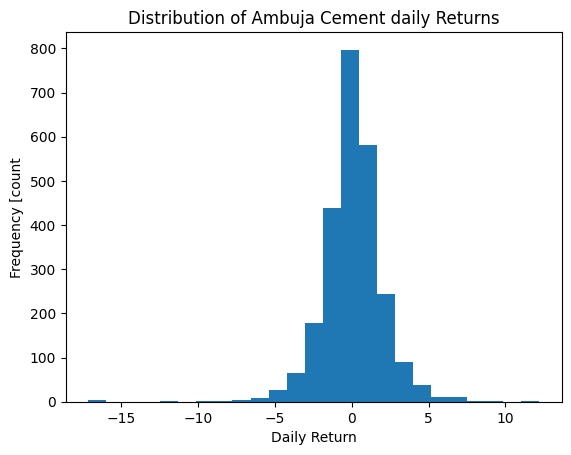

In [30]:
# Create histogram of `y_ambuja`, 25 bins
plt.hist(y_ambuja, bins=25)

# Add axis labels
plt.xlabel("Daily Return")
plt.ylabel("Frequency [count")


# Add title
plt.title("Distribution of Ambuja Cement daily Returns")

Text(0.5, 1.0, 'Distribution of Suzlon daily Returns')

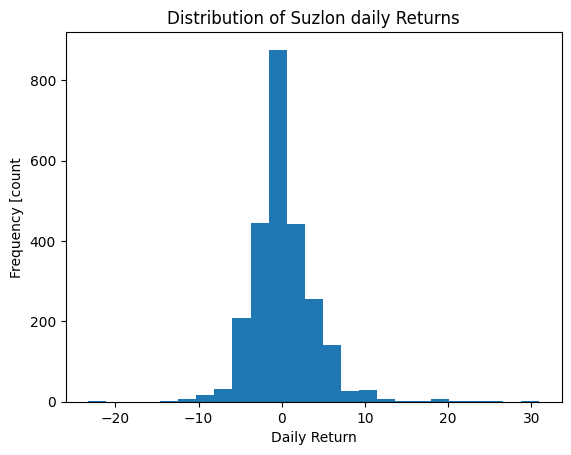

In [31]:
# Create histogram of `y_ambuja`, 25 bins
plt.hist(y_suzlon, bins=25)

# Add axis labels
plt.xlabel("Daily Return")
plt.ylabel("Frequency [count")


# Add title
plt.title("Distribution of Suzlon daily Returns")


In [32]:
# calculate the daily volatility for the two companies
suzlon_daily_volatility = y_suzlon.std()
ambuja_daily_volatility = y_ambuja.std()

print("Suzlon Daily Volatility:", suzlon_daily_volatility)
print("Ambuja Daily Volatility:", ambuja_daily_volatility)

Suzlon Daily Volatility: 3.6359045917872725
Ambuja Daily Volatility: 1.9601317686318414


In [33]:
# calculate the anual volatility
suzlon_annual_volatility = suzlon_daily_volatility * np.sqrt(252)
ambuja_annual_volatility = ambuja_daily_volatility * np.sqrt(252)

print("Suzlon Annual Volatility:", suzlon_annual_volatility)
print("Ambuja Annual Volatility:", ambuja_annual_volatility)

Suzlon Annual Volatility: 57.71819604376165
Ambuja Annual Volatility: 31.116127180302296


In [34]:
#calculate rolling volatility for ambujacem with a window of 50 days
ambuja_rolling_50d_volatility = y_ambuja.rolling(window=50).std().dropna()

print("rolling_50d_volatility type:", type(ambuja_rolling_50d_volatility))
print("rolling_50d_volatility shape:", ambuja_rolling_50d_volatility.shape)
ambuja_rolling_50d_volatility.head()

rolling_50d_volatility type: <class 'pandas.core.series.Series'>
rolling_50d_volatility shape: (2451,)


date
2016-02-02    1.365472
2016-02-03    1.382271
2016-02-04    1.405649
2016-02-05    1.403113
2016-02-08    1.406861
Name: return, dtype: float64

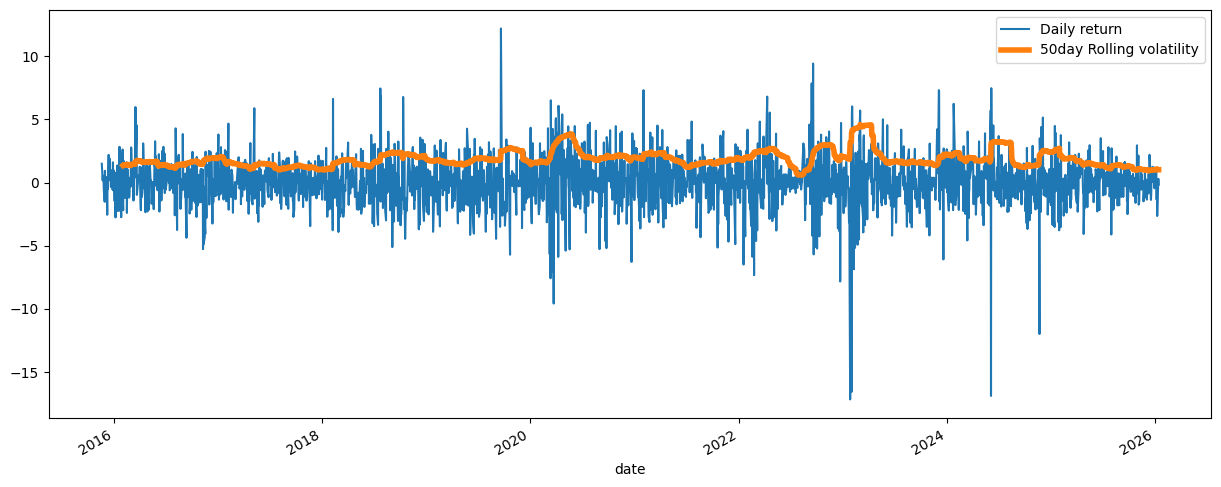

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja`
y_ambuja.plot(ax=ax, label="Daily return")

# Plot `ambuja_rolling_50d_volatility`
ambuja_rolling_50d_volatility.plot(ax=ax, label="50day Rolling volatility", linewidth=4)

# Add x-axis label
plt.xlabel("date")

# Add legend
plt.legend();

Text(0, 0.5, 'Squared Returns')

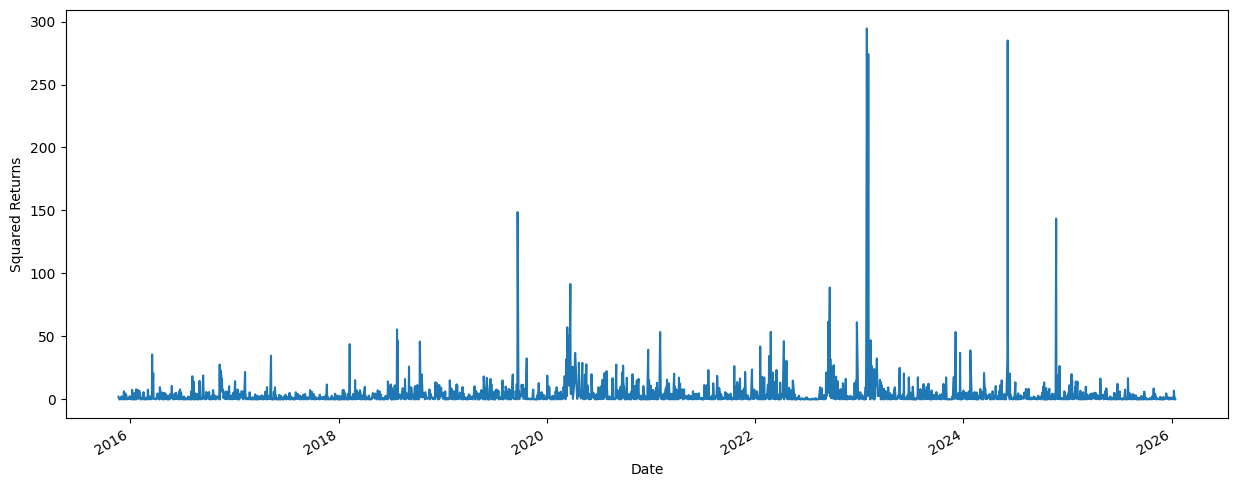

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot squared returns
(y_ambuja**2).plot(ax=ax)


# Add axis labels
plt.xlabel("Date")
plt.ylabel("Squared Returns")


Text(0, 0.5, 'Corelation coefficient')

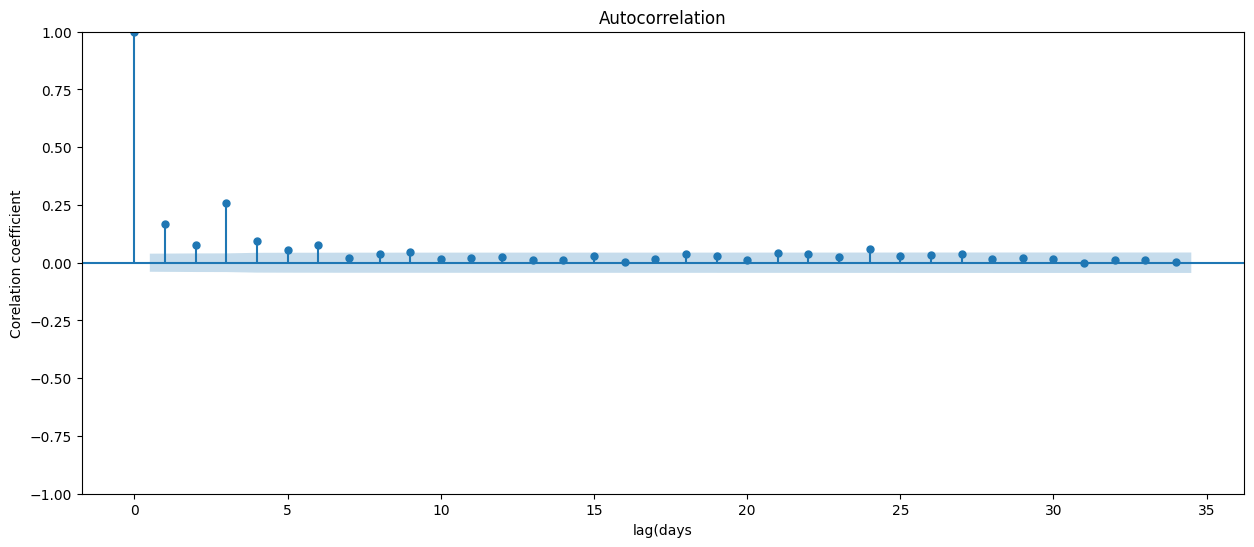

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared returns
plot_acf(y_ambuja**2, ax=ax)

# Add axis labels
plt.xlabel("lag(days")
plt.ylabel("Corelation coefficient")


Text(0, 0.5, 'Corelation coefficient')

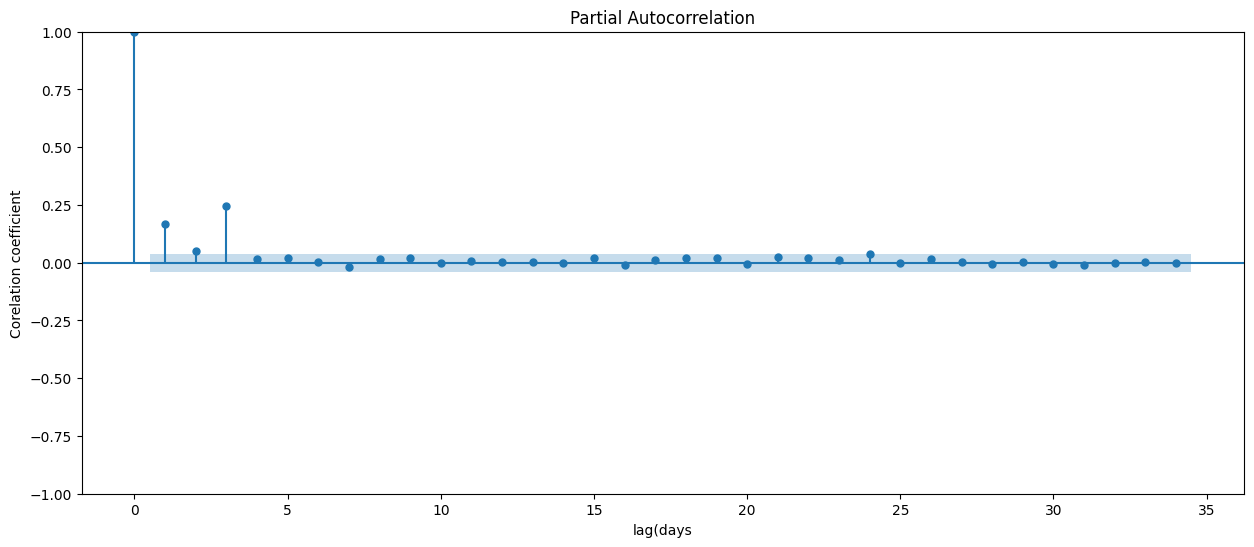

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create PACF of squared returns
plot_pacf(y_ambuja**2, ax=ax)


# Add axis labels
plt.xlabel("lag(days")
plt.ylabel("Corelation coefficient")


In [39]:
#create a training set
cutt_off_test = int(len(y_ambuja) * 0.8)
y_ambuja_train = y_ambuja.iloc[:cutt_off_test]

In [40]:
# instantiate and train model
model = arch_model(
    y_ambuja_train,
    p=1,
    q=1,
    rescale=False
).fit(disp=0)
#print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4065.84
Distribution:                  Normal   AIC:                           8139.67
Method:            Maximum Likelihood   BIC:                           8162.07
                                        No. Observations:                 2000
Date:                Fri, Jan 16 2026   Df Residuals:                     1999
Time:                        10:53:00   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0916  3.860e-02      2.372  1.769e-02 [1.590e-02,  0.167]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2052  9.966e-02      2.059  3.953e-02 [9.831e-03,  0.400]
alpha[1]       0.1001  3.211e-02      3.117  1.824e-03 [3.716e-02,  0.163]
beta[1]        0.8490  4.970e-02     17.084  1.958e-65   [  0.752,  0.946]
==========================================================================

Covariance estimator: robust
"""

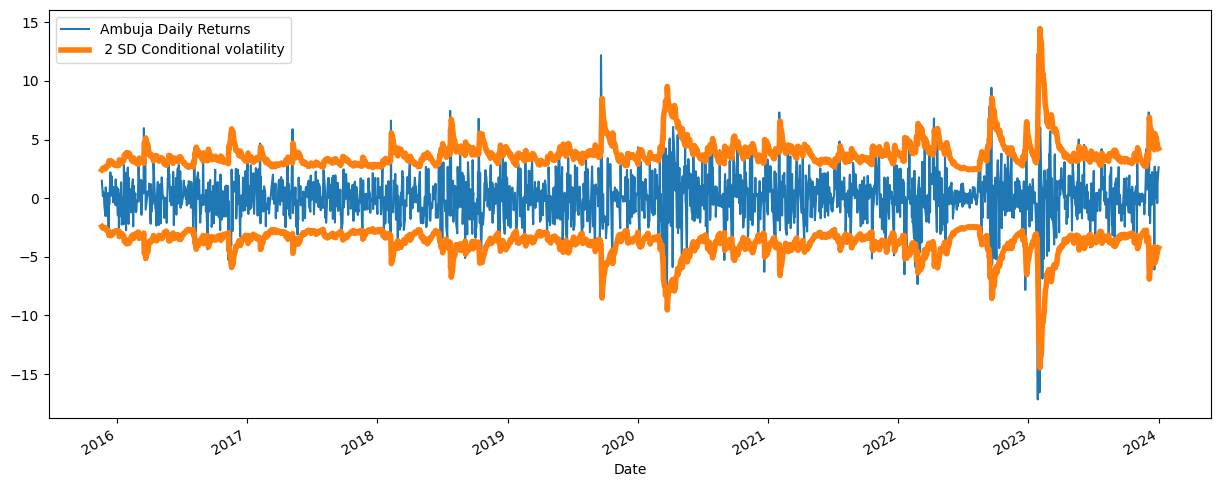

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja_train`
y_ambuja_train.plot(ax=ax, label="Ambuja Daily Returns")

# Plot conditional volatility * 2
(2 * model.conditional_volatility).plot(
    ax=ax, color="C1", label=" 2 SD Conditional volatility",  linewidth=4
)

# Plot conditional volatility * -2
(-2 * model.conditional_volatility.rename("")).plot(
    ax=ax, color="C1",  linewidth=4
)

# Add axis labels
plt.xlabel("Date")


# Add legend
plt.legend();

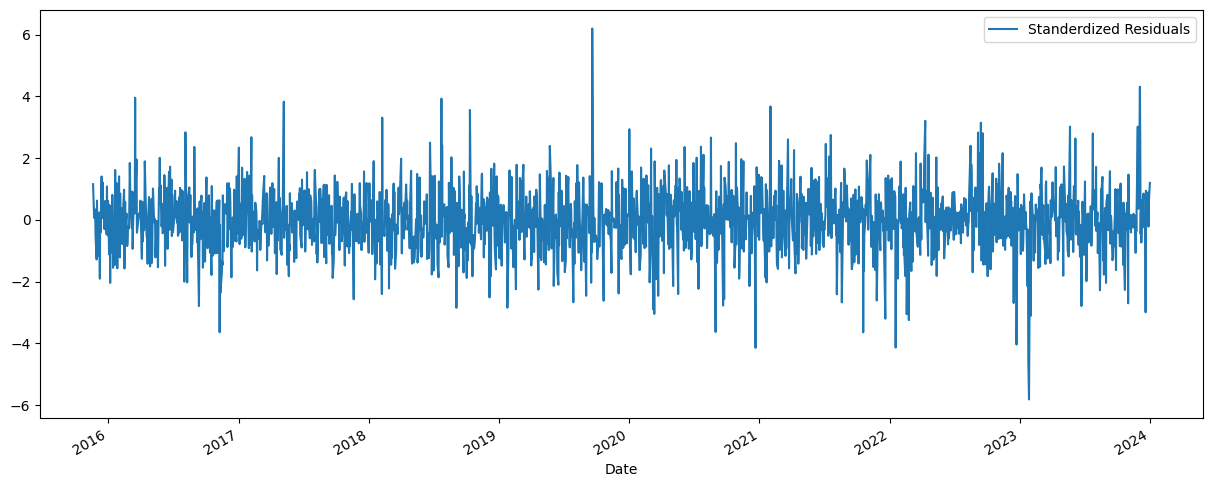

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot standardized residuals
model.std_resid.plot(ax=ax, label="Standerdized Residuals")

# Add axis labels
plt.xlabel("Date")


# Add legend
plt.legend();

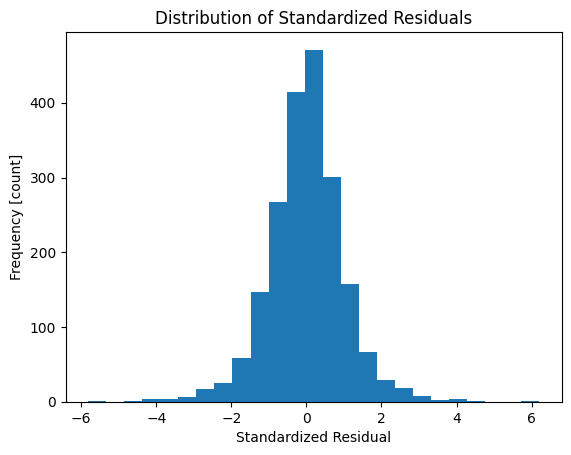

In [43]:
# Create histogram of standardized residuals, 25 bins
plt.hist(model.std_resid, bins=25)
# Add axis labels
plt.xlabel("Standardized Residual")
plt.ylabel("Frequency [count]")

# Add title
plt.title("Distribution of Standardized Residuals");

Text(0, 0.5, 'Correlation Coefficient')

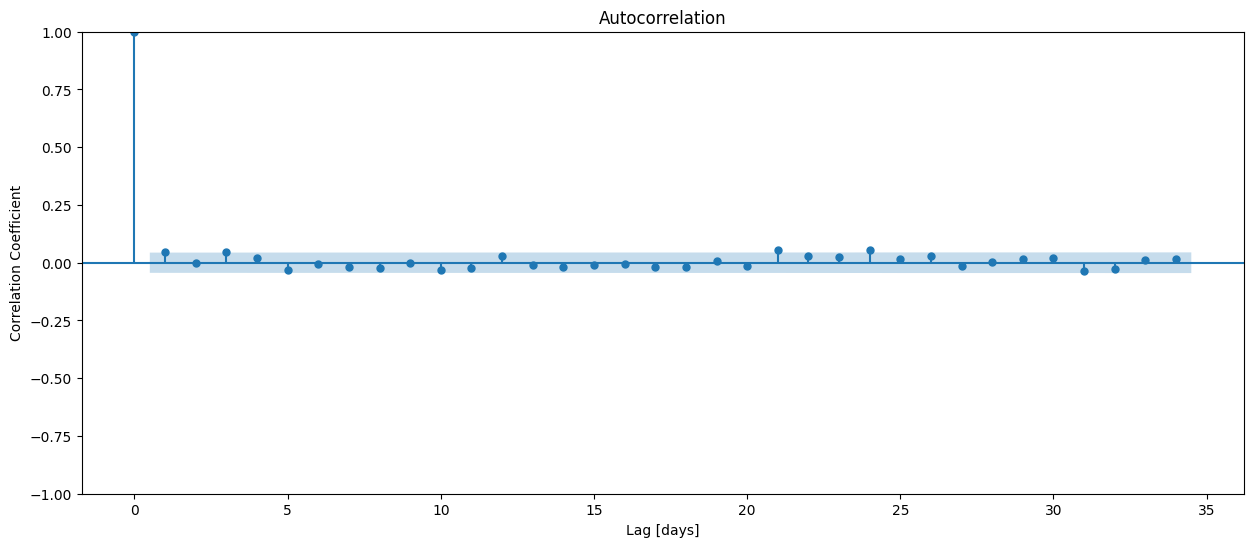

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared, standardized residuals
plot_acf(model.std_resid**2, ax=ax)
# Add axis labels
plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient")

In [45]:
# Create empty list to hold predictions
predictions = []

# Calculate size of test data (20%)
test_size = int(len(y_ambuja) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = y_ambuja.iloc[: -(test_size - i)]

    # Train model
    model = arch_model(
        y_train,
        p=1,
        q=1,
        rescale=False
    ).fit(disp=0)

    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon=1, reindex=False).variance.iloc[0,0] ** 0.5

    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv = pd.Series(predictions, index=y_ambuja.tail(test_size).index)

print("y_test_wfv type:", type(y_test_wfv))
print("y_test_wfv shape:", y_test_wfv.shape)
y_test_wfv.head()

y_test_wfv type: <class 'pandas.core.series.Series'>
y_test_wfv shape: (500,)


date
2024-01-02    2.164077
2024-01-03    2.060553
2024-01-04    1.974981
2024-01-05    2.014771
2024-01-08    1.959179
dtype: float64

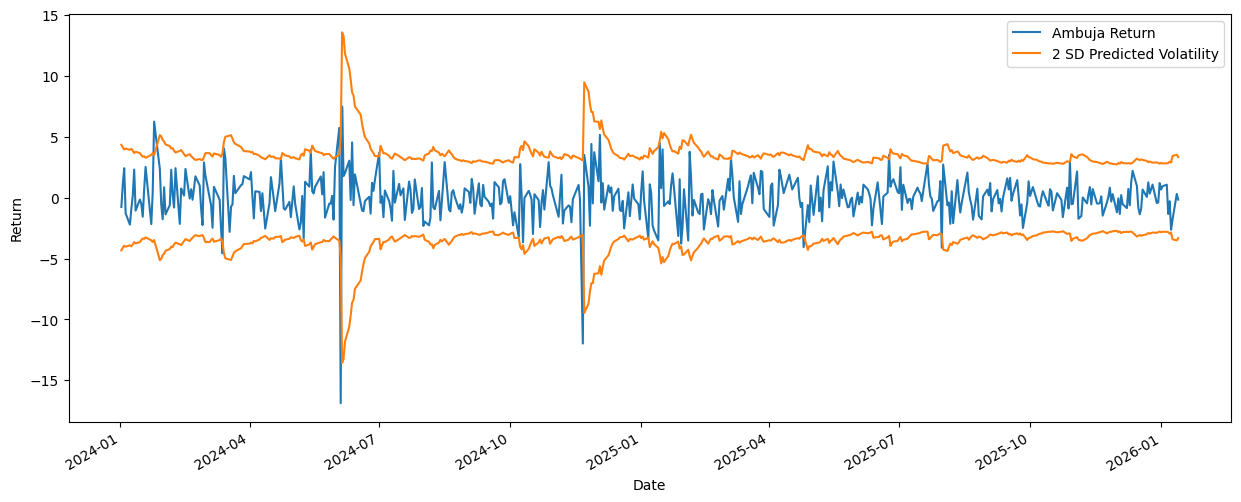

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for test data
y_ambuja.tail(test_size).plot(ax=ax, label="Ambuja Return")

# Plot volatility predictions * 2
(2 * y_test_wfv).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

# Plot volatility predictions * -2
(-2 * y_test_wfv).plot(ax=ax, c="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

In [47]:
def clean_prediction(prediction):
    """Reformat model prediction to JSON.

    Parameters
    ----------
    prediction : pd.DataFrame
        Variance from a `ARCHModelForecast`

    Returns
    -------
    dict
        Forecast of volatility. Each key is date in ISO 8601 format.
        Each value is predicted volatility.
    """
    # Calculate forecast start date
    start = prediction.index[0] + pd.DateOffset(days=1)

    # Create date range
    prediction_dates = pd.bdate_range(start=start, periods=prediction.shape[1])

    # Create prediction index labels, ISO 8601 format
    prediction_index = [d.isoformat() for d in prediction_dates]
 
    # Extract predictions from DataFrame, get square root
    data = prediction.values.flatten() ** 0.5
 

    # Combine `data` and `prediction_index` into Series
    prediction_formatted = pd.Series(data, index=prediction_index)
    

    # Return Series as dictionary
    return prediction_formatted.to_dict()